In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [206]:
#ticker
ticker_symbol = "VOO"

In [207]:
#Get data
ticker = yf.Ticker(ticker_symbol)
data = ticker.history(period="max")

print(data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-09-09 00:00:00-04:00   77.890936   77.890936   76.857455   76.994240   
2010-09-10 00:00:00-04:00   77.267791   77.404575   76.979026   77.343781   
2010-09-13 00:00:00-04:00   78.240508   78.377292   77.890949   78.316498   
2010-09-14 00:00:00-04:00   78.149269   78.635617   77.799710   78.301254   
2010-09-15 00:00:00-04:00   77.982131   78.559659   77.814949   78.498871   
...                               ...         ...         ...         ...   
2025-10-15 00:00:00-04:00  613.070007  616.210022  605.820007  611.429993   
2025-10-16 00:00:00-04:00  613.109985  614.799988  604.140015  607.390015   
2025-10-17 00:00:00-04:00  606.340027  612.020020  605.099976  610.760010   
2025-10-20 00:00:00-04:00  613.510010  618.010010  613.510010  617.169983   
2025-10-21 00:00:00-04:00  617.330017  618.719971  615.981018  617.090027   

In [208]:
#Predicting whether the stock price will go up or down in 7 days
data["7Days"]=data["Close"].shift(-7)

#Create target variable
data["Target"]=(data["7Days"]>data["Close"]).astype(int)


data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,7Days,Target
Date,,,,,,,,,,
2010-09-09 00:00:00-04:00,77.890936,77.890936,76.857455,76.994240,26500,0.0,0.0,0.0,79.821114,1
2010-09-10 00:00:00-04:00,77.267791,77.404575,76.979026,77.343781,8600,0.0,0.0,0.0,79.577957,1
2010-09-13 00:00:00-04:00,78.240508,78.377292,77.890949,78.316498,33750,0.0,0.0,0.0,79.152405,1
2010-09-14 00:00:00-04:00,78.149269,78.635617,77.799710,78.301254,59400,0.0,0.0,0.0,78.498871,1
2010-09-15 00:00:00-04:00,77.982131,78.559659,77.814949,78.498871,9250,0.0,0.0,0.0,80.101814,1


# Exploratory Data Analysis

In [209]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,7Days,Target
count,3803.000000,3803.000000,3803.000000,3803.000000,3.803000e+03,3803.000000,3803.000000,3803.0,3796.000000,3803.000000
mean,249.922627,251.212298,248.498819,249.962029,3.007436e+06,0.018316,0.000131,0.0,250.279011,0.628714
std,136.942488,137.659659,136.149599,136.970320,2.889662e+06,0.152097,0.008108,0.0,136.897299,0.483212
min,77.237400,77.404575,76.536233,76.994240,8.600000e+03,0.000000,0.000000,0.0,78.172302,0.000000
25%,144.714414,145.676841,144.001148,144.866127,1.117300e+06,0.000000,0.000000,0.0,145.147232,0.000000
50%,216.664297,217.597232,214.906425,216.465515,2.416850e+06,0.000000,0.000000,0.0,216.628616,1.000000
75%,356.427716,358.805484,354.190835,357.597107,4.102850e+06,0.000000,0.000000,0.0,357.731964,1.000000
max,619.229980,619.599976,615.981018,618.770020,3.541800e+07,1.812000,0.500000,0.0,618.770020,1.000000


Apple stock closing price ranged from 0.03 to 262.77

Volume has a minimum of 0 to 7.4 e^9

Mean of target is .58 meaning that the target variable is pretty balanced

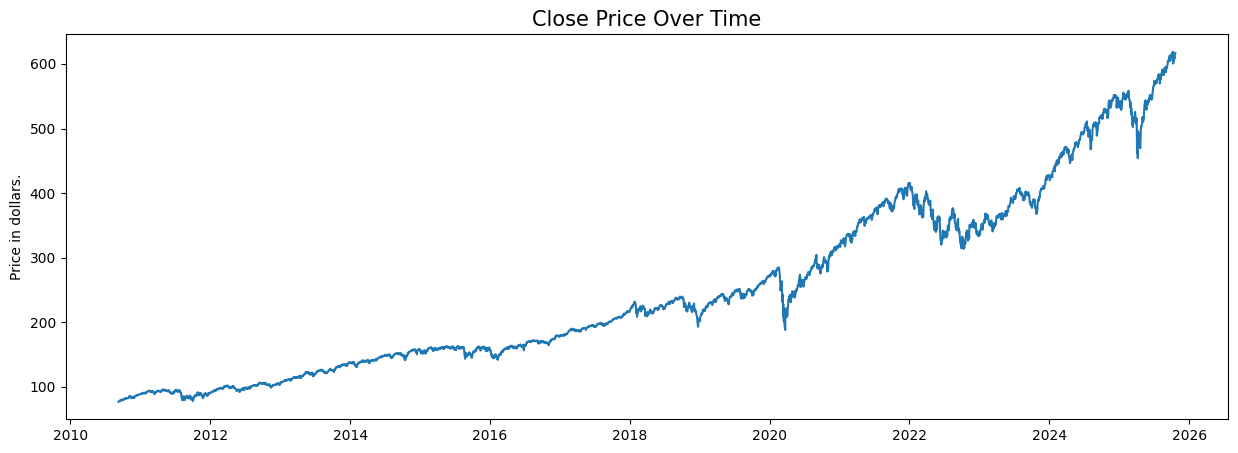

In [210]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Close Price Over Time', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

# Machine Learning

In [211]:
#Define features for ML and Target Variables
features = data[["Open", "High", "Low", "Close", "Volume"]]
target = data['Target']

features_scaled = StandardScaler().fit_transform(features)

In [212]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3042, 5)
Testing set shape: (761, 5)


In [213]:
#Create Random Forest Model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [214]:
#Model make predictions
predict = model.predict(X_test)

In [215]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.633377135348226
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.43      0.47       293
           1       0.68      0.76      0.72       468

    accuracy                           0.63       761
   macro avg       0.61      0.60      0.60       761
weighted avg       0.62      0.63      0.62       761

Confusion Matrix:
[[126 167]
 [112 356]]


In [216]:
#Test Logistic Regression Model
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [217]:
#Make predictions
predict2 = model2.predict(X_test)

In [218]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict2)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict2)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict2)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.6149802890932983
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       293
           1       0.61      1.00      0.76       468

    accuracy                           0.61       761
   macro avg       0.31      0.50      0.38       761
weighted avg       0.38      0.61      0.47       761

Confusion Matrix:
[[  0 293]
 [  0 468]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [219]:
#Create SVM Model
model3 = SVC(kernel='rbf')
model3.fit(X_train, y_train)

SVC()

In [220]:
#Make predictions
predict3 = model3.predict(X_test)

In [221]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict3)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict3)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict3)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.6162943495400789
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       293
           1       0.62      1.00      0.76       468

    accuracy                           0.62       761
   macro avg       0.81      0.50      0.38       761
weighted avg       0.76      0.62      0.47       761

Confusion Matrix:
[[  1 292]
 [  0 468]]


In [222]:
#XGBoost
model4 = XGBClassifier()
model4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [223]:
predict4 = model4.predict(X_test)

In [224]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict4)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict4)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict4)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.6465177398160316
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.43      0.48       293
           1       0.69      0.78      0.73       468

    accuracy                           0.65       761
   macro avg       0.62      0.61      0.61       761
weighted avg       0.64      0.65      0.64       761

Confusion Matrix:
[[126 167]
 [102 366]]


Next 7 days Prediction Using XGBoost

In [225]:
last_day_data = data.tail(1)
print(last_day_data)

                                 Open        High         Low       Close  \
Date                                                                        
2025-10-21 00:00:00-04:00  617.330017  618.719971  615.981018  617.090027   

                            Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                         
2025-10-21 00:00:00-04:00  4166416        0.0           0.0            0.0   

                           7Days  Target  
Date                                      
2025-10-21 00:00:00-04:00    NaN       0  


In [226]:
new_features = last_day_data[["Open", "High", "Low", "Close", "Volume"]]
new_features_scaled = StandardScaler().fit_transform(new_features)
predict4 = model4.predict(new_features_scaled)
print(predict4)

[0]


The prediction is that the stock price will not go up in the next 7 days